In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt



In [2]:
# folder1=r"C:\Users\Ajinkya Sathe\Desktop\CV_CP\kektad plant"
# folder2=r"C:\Users\Ajinkya Sathe\Desktop\CV_CP\single cactus image"
# folder1 = r"C:\Users\Ajinkya Sathe\Desktop\kaggle_dataset\training_set\cactus"
# folder2 = r"C:\Users\Ajinkya Sathe\Desktop\kaggle_dataset\training_set\no_cactus"
# folder1 = r"C:\Users\Ajinkya Sathe\Desktop\CV_CP\cactus_aug"
# folder2 = r"C:\Users\Ajinkya Sathe\Desktop\CV_CP\non_cactus_aug"
folder1 = r"C:\Users\Ajinkya Sathe\Desktop\CV_CP\bg_remove_cactus"
folder2 = r"C:\Users\Ajinkya Sathe\Desktop\CV_CP\bg_remove_non_cactus"

In [3]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100,100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    #brisk = cv2.BRISK_create()
    #keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    
    # sift as feature descriptor
    sift = cv2.SIFT_create()
    keypoint, descriptor = sift.detectAndCompute(img_prewitt, None)

    
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
  
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (141, 128)
descriptor shape  1  :  (37, 128)
descriptor shape  2  :  (55, 128)
descriptor shape  3  :  (66, 128)
descriptor shape  4  :  (39, 128)
descriptor shape  5  :  (97, 128)
descriptor shape  6  :  (76, 128)
descriptor shape  7  :  (93, 128)
descriptor shape  8  :  (89, 128)
descriptor shape  9  :  (54, 128)
descriptor shape  10  :  (121, 128)
descriptor shape  11  :  (92, 128)
descriptor shape  12  :  (75, 128)
descriptor shape  13  :  (102, 128)
descriptor shape  14  :  (78, 128)
descriptor shape  15  :  (59, 128)
descriptor shape  16  :  (102, 128)
descriptor shape  17  :  (66, 128)
descriptor shape  18  :  (44, 128)
descriptor shape  19  :  (82, 128)
descriptor shape  20  :  (64, 128)
descriptor shape  21  :  (104, 128)
descriptor shape  22  :  (60, 128)
descriptor shape  23  :  (58, 128)
descriptor shape  24  :  (51, 128)
descriptor shape  25  :  (52, 128)
descriptor shape  26  :  (108, 128)
descriptor shape  27  :  (100, 128)
descriptor shape  28  :

In [4]:
i=0
k=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(200,200)
    img=cv2.resize(a,resize)
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    #brisk = cv2.BRISK_create()
    #keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    
    # sift as feature descriptor
    sift = cv2.SIFT_create()
    keypoint, descriptor = sift.detectAndCompute(img_prewitt, None)

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder2.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (630, 128)
descriptor shape  1  :  (371, 128)
descriptor shape  2  :  (596, 128)
descriptor shape  3  :  (374, 128)
descriptor shape  4  :  (305, 128)
descriptor shape  5  :  (319, 128)
descriptor shape  6  :  (347, 128)
descriptor shape  7  :  (475, 128)
descriptor shape  8  :  (456, 128)
descriptor shape  9  :  (639, 128)
descriptor shape  10  :  (373, 128)
descriptor shape  11  :  (574, 128)
descriptor shape  12  :  (259, 128)
descriptor shape  13  :  (218, 128)
descriptor shape  14  :  (644, 128)
descriptor shape  15  :  (534, 128)
descriptor shape  16  :  (445, 128)
descriptor shape  17  :  (420, 128)
descriptor shape  18  :  (331, 128)
descriptor shape  19  :  (626, 128)
descriptor shape  20  :  (199, 128)
descriptor shape  21  :  (208, 128)
descriptor shape  22  :  (369, 128)
descriptor shape  23  :  (186, 128)
descriptor shape  24  :  (159, 128)
descriptor shape  25  :  (409, 128)
descriptor shape  26  :  (412, 128)
descriptor shape  27  :  (619, 128)
de

In [3]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,6,1,18,60,119,126,27,7,126,19,...,4,0,0,0,0,0,0,0,0,0
1,45,1,0,2,16,45,12,6,161,11,...,3,8,0,0,0,1,10,7,0,0
2,3,0,0,0,0,0,0,1,144,43,...,1,2,48,73,12,8,12,0,3,16
3,0,3,1,0,1,0,0,0,0,4,...,58,25,125,125,6,1,3,46,28,23
4,2,14,62,35,62,136,45,4,32,5,...,1,28,0,1,21,14,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99014,60,20,22,98,45,1,1,46,134,5,...,10,4,47,8,2,10,49,38,2,8
99015,0,0,0,0,0,0,0,0,25,0,...,2,68,81,9,2,15,73,9,1,17
99016,54,10,0,0,0,0,0,0,125,45,...,0,0,15,108,27,10,3,0,0,0
99017,3,1,0,0,0,0,0,0,144,17,...,0,0,32,95,47,67,9,0,0,0


In [4]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data2= pd.read_csv('folder2.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,1,1,0,0,0,1,0,6,9,...,31,29,24,61,27,4,7,135,123,25
1,39,48,90,124,65,6,8,37,30,124,...,0,0,0,0,0,2,3,0,0,0
2,28,0,0,0,0,0,0,4,98,0,...,96,130,130,28,8,17,29,52,61,101
3,0,0,0,0,0,0,0,0,62,0,...,3,7,18,19,30,32,43,21,5,6
4,1,0,0,0,0,0,0,0,31,0,...,3,73,57,8,5,24,48,11,14,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383273,26,0,0,0,0,0,0,20,23,0,...,1,5,0,0,37,123,28,22,2,0
383274,0,0,0,0,0,5,24,13,0,0,...,6,6,4,25,100,41,3,4,9,7
383275,48,0,0,0,0,0,0,33,125,32,...,3,4,22,125,54,2,4,7,7,8
383276,4,2,1,0,0,0,3,4,63,5,...,0,30,20,34,54,41,13,1,1,13


In [5]:
data=data1.append(data2)
data

C:\Users\Ajinkya Sathe\AppData\Local\Temp\ipykernel_16192\3415887423.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,6,1,18,60,119,126,27,7,126,19,...,4,0,0,0,0,0,0,0,0,0
1,45,1,0,2,16,45,12,6,161,11,...,3,8,0,0,0,1,10,7,0,0
2,3,0,0,0,0,0,0,1,144,43,...,1,2,48,73,12,8,12,0,3,16
3,0,3,1,0,1,0,0,0,0,4,...,58,25,125,125,6,1,3,46,28,23
4,2,14,62,35,62,136,45,4,32,5,...,1,28,0,1,21,14,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383273,26,0,0,0,0,0,0,20,23,0,...,1,5,0,0,37,123,28,22,2,0
383274,0,0,0,0,0,5,24,13,0,0,...,6,6,4,25,100,41,3,4,9,7
383275,48,0,0,0,0,0,0,33,125,32,...,3,4,22,125,54,2,4,7,7,8
383276,4,2,1,0,0,0,3,4,63,5,...,0,30,20,34,54,41,13,1,1,13


In [7]:
#save appended data into a csv file
csv_data=data.to_csv('finalData.csv', mode='a', header=False,index=False)

KeyboardInterrupt: 

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,6,1,18,60,119,126,27,7,126,19,...,4,0,0,0,0,0,0,0,0,0
1,45,1,0,2,16,45,12,6,161,11,...,3,8,0,0,0,1,10,7,0,0
2,3,0,0,0,0,0,0,1,144,43,...,1,2,48,73,12,8,12,0,3,16
3,0,3,1,0,1,0,0,0,0,4,...,58,25,125,125,6,1,3,46,28,23
4,2,14,62,35,62,136,45,4,32,5,...,1,28,0,1,21,14,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383273,26,0,0,0,0,0,0,20,23,0,...,1,5,0,0,37,123,28,22,2,0
383274,0,0,0,0,0,5,24,13,0,0,...,6,6,4,25,100,41,3,4,9,7
383275,48,0,0,0,0,0,0,33,125,32,...,3,4,22,125,54,2,4,7,7,8
383276,4,2,1,0,0,0,3,4,63,5,...,0,30,20,34,54,41,13,1,1,13


In [ ]:
# data = pd.read_csv('finalData.csv', header = None, dtype = 'uint8')

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,6,1,18,60,119,126,27,7,126,19,...,4,0,0,0,0,0,0,0,0,0
1,45,1,0,2,16,45,12,6,161,11,...,3,8,0,0,0,1,10,7,0,0
2,3,0,0,0,0,0,0,1,144,43,...,1,2,48,73,12,8,12,0,3,16
3,0,3,1,0,1,0,0,0,0,4,...,58,25,125,125,6,1,3,46,28,23
4,2,14,62,35,62,136,45,4,32,5,...,1,28,0,1,21,14,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383273,26,0,0,0,0,0,0,20,23,0,...,1,5,0,0,37,123,28,22,2,0
383274,0,0,0,0,0,5,24,13,0,0,...,6,6,4,25,100,41,3,4,9,7
383275,48,0,0,0,0,0,0,33,125,32,...,3,4,22,125,54,2,4,7,7,8
383276,4,2,1,0,0,0,3,4,63,5,...,0,30,20,34,54,41,13,1,1,13


In [ ]:
# # reshape the array to have a single column and multiple rows
# reshaped_arr = arr.reshape(-1, 1)

In [8]:
wcss = []
clus=[]
j=0
for i in range(3, 23, 2): 
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
   kmeans.fit(data) 
   wcss.append(kmeans.inertia_)
   clus.append(i)
   print(i,": ",wcss[j])
   j+=1

3 :  52119844908.45315
5 :  48919578293.59376
7 :  47428436423.91567
9 :  46223387812.85801
11 :  45175383103.91417
13 :  44316580768.79656
15 :  43626075781.62799
17 :  42990213488.62896
19 :  42444097662.07182
21 :  41985946578.701904


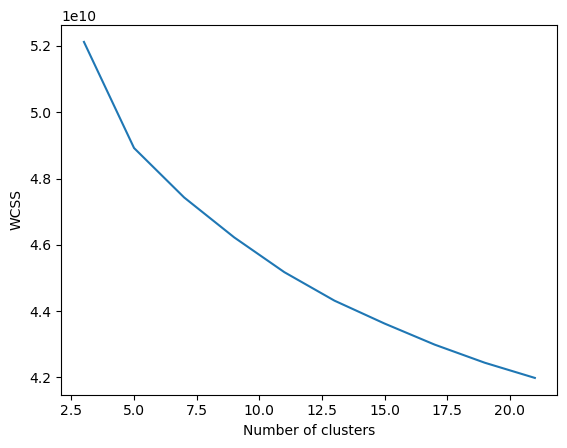

In [9]:
plt.plot(range(3, 23, 2), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(data)

In [ ]:
# #for Non-catcus
# kmeans1 = KMeans(n_clusters=5)
# kmeans1.fit(data1)

In [ ]:
# #for Catus
# kmeans2 = KMeans(n_clusters=5)
# kmeans2.fit(data2)

In [ ]:
# hist1=np.histogram(kmeans1.labels_,bins=[0,1,2,3,4,5])
# hist2=np.histogram(kmeans2.labels_,bins=[0,1,2,3,4,5])

In [10]:
# Applying Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [13]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [11]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5])
print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([111247,  85444,  85350,  88389, 111867], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [15]:
# #performing kmeans prediction of the entire  dataset with the pretrained kmeans model

# #initialising i=0; as its the 1st class

# i=0
# data=[]
# c=0

# for filename in os.listdir(folder1):
#     #path
#     path=os.path.join(folder1,filename)
# #     print(f"Path: {path}")
#     a=cv2.imread(path)

#     #resize image
#     resize=(100, 100)
#     img=cv2.resize(a,resize)
    
#     #gray image
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
#      # creating a Histograms Equalization of a image using cv2.equalizeHist()
#     equ = cv2.equalizeHist(img2)
        
#     kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
#     kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#     img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
#     img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
#     img_prewitt = img_prewittx + img_prewitty

#     #brisk code for feature descriptor
# #     brisk = cv2.BRISK_create()
# #     keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    
#     # sift as feature descriptor
#     sift = cv2.SIFT_create()
#     keypoint, descriptor = sift.detectAndCompute(img_prewitt, None)
        
#     out=pd.DataFrame(descriptor)
#     #predict values of feature vector with pretrained kmeans
    
#     array_double = np.array(out, dtype=np.double)
#     a=kmeans.predict(array_double)
    
#     hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
#     #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
#     data.append(hist[0]/len(keypoint))
#     print("keypoint length ",c," : ", len(keypoint))
#     c=c+1
#     if c==2000:
#         break
# #convert Array to Dataframe and append to the list
# Output = pd.DataFrame(data)
# #add row class 
# Output["Class"] = i 
# csv_data=Output.to_csv('finalFolder1.csv', mode='a',header=False,index=False)

# # load kmeans model
# # with open('Kmeans_CL_2_Model.sav', 'rb') as file:
# #     kmeans = pickle.load(file)

# performing kmeans prediction of the entire dataset with the pretrained kmeans model
i = 0
data = []
c = 0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
#     print(f"Path: {path}")
    a=cv2.imread(path)

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
#     brisk = cv2.BRISK_create()
#     keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    
    # sift as feature descriptor
    sift = cv2.SIFT_create()
    keypoint, descriptor = sift.detectAndCompute(img_prewitt, None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    array_double = np.array(out, dtype=np.double)
#     a=kmeans.predict(array_double.reshape(1, -1)) # reshape to 2D array before prediction
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",c," : ", len(keypoint))
    c=c+1
    if c==2000:
        break
        
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1.csv', mode='a',header=False,index=False)

#bottle
# i=0
# data=[]

# for filename in os.listdir(folder1):
#     path=os.path.join(folder1,filename)
#     print(f"Path: {path}")
#     a=cv2.imread(path)
#     resize=(512,512)
#     img=cv2.resize(a,resize)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     #initialise sift descriptor
#     sift = cv2.SIFT_create()
#     keypoints, descriptors = sift.detectAndCompute(gray, None)
    
#     #convert the descriptor array into a dataframe format
#     out=pd.DataFrame(descriptors)
    
#     array_double = np.array(out, dtype=np.double)
#     print(array_double)
#     a=kmeans.predict(array_double)
#     hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])
#     data.append(hist[0])
    

# Output = pd.DataFrame(data)
# #add row class 
# Output["Class"] = i 
# csv_data=Output.to_csv('finalFolder1.csv', mode='a', index=False)



keypoint length  0  :  141
keypoint length  1  :  37
keypoint length  2  :  55
keypoint length  3  :  66
keypoint length  4  :  39
keypoint length  5  :  97
keypoint length  6  :  76
keypoint length  7  :  93
keypoint length  8  :  89
keypoint length  9  :  54
keypoint length  10  :  121
keypoint length  11  :  92
keypoint length  12  :  75
keypoint length  13  :  102
keypoint length  14  :  78
keypoint length  15  :  59
keypoint length  16  :  102
keypoint length  17  :  66
keypoint length  18  :  44
keypoint length  19  :  82
keypoint length  20  :  64
keypoint length  21  :  104
keypoint length  22  :  60
keypoint length  23  :  58
keypoint length  24  :  51
keypoint length  25  :  52
keypoint length  26  :  108
keypoint length  27  :  100
keypoint length  28  :  86
keypoint length  29  :  49
keypoint length  30  :  140
keypoint length  31  :  122
keypoint length  32  :  87
keypoint length  33  :  68
keypoint length  34  :  72
keypoint length  35  :  49
keypoint length  36  :  65
ke

In [16]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=1; as its the 2st class

# i=1
# data=[]
# c=0

# for filename in os.listdir(folder2):
#     #path
#     path=os.path.join(folder2,filename)
#     a=cv2.imread(path)

#     #resize image
#     resize=(100, 100)
#     img=cv2.resize(a,resize)
    
#     #gray image
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
#      # creating a Histograms Equalization of a image using cv2.equalizeHist()
#     equ = cv2.equalizeHist(img2)
        
#     kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
#     kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#     img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
#     img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
#     img_prewitt = img_prewittx + img_prewitty

#     #brisk code for feature descriptor
# #     brisk = cv2.BRISK_create()
# #     keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)

#     # sift as feature descriptor
#     sift = cv2.SIFT_create()
#     keypoint, descriptor = sift.detectAndCompute(img_prewitt, None)


        
#     out=pd.DataFrame(descriptor)
#     #predict values of feature vector with pretrained kmeans
    
#     array_double = np.array(out, dtype=np.double)
#     a=kmeans.predict(array_double)
    
#     hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
#     #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
#     data.append(hist[0]/len(keypoint))
#     print("keypoint length ",c," : ", len(keypoint))
#     c=c+1
#     if c==2000:
#         break
# #convert Array to Dataframe and append to the list
# Output = pd.DataFrame(data)
# #add row class 
# Output["Class"] = i 
# csv_data=Output.to_csv('finalFolder3.csv', mode='a',header=False,index=False)

# performing kmeans prediction of the entire dataset with the pretrained kmeans model
i = 1
data = []
c = 0

for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
#     print(f"Path: {path}")
    a=cv2.imread(path)

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
#     brisk = cv2.BRISK_create()
#     keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    
    # sift as feature descriptor
    sift = cv2.SIFT_create()
    keypoint, descriptor = sift.detectAndCompute(img_prewitt, None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    array_double = np.array(out, dtype=np.double)
#     a=kmeans.predict(array_double.reshape(1, -1)) # reshape to 2D array before prediction
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",c," : ", len(keypoint))
    c=c+1
    if c==2000:
        break
        
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder2.csv', mode='a',header=False,index=False)

keypoint length  0  :  178
keypoint length  1  :  101
keypoint length  2  :  150
keypoint length  3  :  113
keypoint length  4  :  105
keypoint length  5  :  80
keypoint length  6  :  100
keypoint length  7  :  110
keypoint length  8  :  146
keypoint length  9  :  170
keypoint length  10  :  104
keypoint length  11  :  160
keypoint length  12  :  76
keypoint length  13  :  74
keypoint length  14  :  159
keypoint length  15  :  129
keypoint length  16  :  141
keypoint length  17  :  98
keypoint length  18  :  81
keypoint length  19  :  161
keypoint length  20  :  58
keypoint length  21  :  51
keypoint length  22  :  113
keypoint length  23  :  63
keypoint length  24  :  58
keypoint length  25  :  129
keypoint length  26  :  98
keypoint length  27  :  148
keypoint length  28  :  108
keypoint length  29  :  174
keypoint length  30  :  145
keypoint length  31  :  97
keypoint length  32  :  67
keypoint length  33  :  134
keypoint length  34  :  85
keypoint length  35  :  108
keypoint length

In [12]:
#Displaying the kmeans predicted data of folder1
print("Catus")
dat1= pd.read_csv('finalFolder1.csv',header=None)
print(dat1)

Catus
                  0            1           2           3           4  5
0       2581.489362    46.773050   29.751773   22.226950   36.773050  0
1      57179.783784   389.054054  206.513514  102.648649   64.054054  0
2        764.690909    13.709091   10.800000    4.109091    5.363636  0
3        606.742424    29.772727   28.439394   14.787879   11.181818  0
4     147238.307692   677.512821  332.205128  218.948718  196.410256  0
...             ...          ...         ...         ...         ... ..
1244    9561.132530   365.060241  137.277108   77.445783   99.602410  0
1245   27226.971429   132.285714   88.342857   44.657143   46.114286  0
1246   21310.863636   131.704545   84.636364   39.954545   44.931818  0
1247  125856.681034  1319.974138  723.758621  425.301724  533.086207  0
1248  141325.621622  1320.000000  705.981982  385.072072  451.405405  0

[1249 rows x 6 columns]


In [13]:
#Displaying the kmeans predicted data of folder2
print("Non-Catus")
dat2= pd.read_csv('finalFolder2.csv',header=None)
print(dat2)

Non-Catus
                0           1           2          3           4  5
0     8729.584270  118.185393   73.146067  54.353933   90.022472  1
1     2849.940594   62.118812   44.574257  24.346535   37.009901  1
2     2760.326667   51.140000   31.853333  14.813333   22.526667  1
3     4023.991150   64.796460   51.017699  28.256637   52.150442  1
4     4750.857143   49.971429   36.695238  13.876190   18.561905  1
..            ...         ...         ...        ...         ... ..
982   3807.716981  194.566038  132.716981  73.584906   90.056604  1
983   5806.030303   86.414141   82.646465  77.080808  160.262626  1
984   3890.376068   48.666667   33.760684  20.940171   38.068376  1
985   5733.254902   85.686275   81.470588  77.803922  157.303922  1
986  13151.854167   42.208333   31.375000  17.979167   31.854167  1

[987 rows x 6 columns]


In [14]:
#appending All kmeans predicted data into 1 dataframe
A = dat1.append(dat2)
A

C:\Users\Ajinkya Sathe\AppData\Local\Temp\ipykernel_16192\2424071763.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = dat1.append(dat2)


,0,1,2,3,4,5
0,2581.489362,46.773050,29.751773,22.226950,36.773050,0
1,57179.783784,389.054054,206.513514,102.648649,64.054054,0
2,764.690909,13.709091,10.800000,4.109091,5.363636,0
3,606.742424,29.772727,28.439394,14.787879,11.181818,0
4,147238.307692,677.512821,332.205128,218.948718,196.410256,0
...,...,...,...,...,...,...
982,3807.716981,194.566038,132.716981,73.584906,90.056604,1
983,5806.030303,86.414141,82.646465,77.080808,160.262626,1
984,3890.376068,48.666667,33.760684,20.940171,38.068376,1
985,5733.254902,85.686275,81.470588,77.803922,157.303922,1


In [20]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [15]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF.csv",header=None)
A

,0,1,2,3,4,5
0,2581.489362,46.773050,29.751773,22.226950,36.773050,0
1,57179.783784,389.054054,206.513514,102.648649,64.054054,0
2,764.690909,13.709091,10.800000,4.109091,5.363636,0
3,606.742424,29.772727,28.439394,14.787879,11.181818,0
4,147238.307692,677.512821,332.205128,218.948718,196.410256,0
...,...,...,...,...,...,...
2231,3807.716981,194.566038,132.716981,73.584906,90.056604,1
2232,5806.030303,86.414141,82.646465,77.080808,160.262626,1
2233,3890.376068,48.666667,33.760684,20.940171,38.068376,1
2234,5733.254902,85.686275,81.470588,77.803922,157.303922,1


In [16]:
df=A

In [17]:
df

,0,1,2,3,4,5
0,2581.489362,46.773050,29.751773,22.226950,36.773050,0
1,57179.783784,389.054054,206.513514,102.648649,64.054054,0
2,764.690909,13.709091,10.800000,4.109091,5.363636,0
3,606.742424,29.772727,28.439394,14.787879,11.181818,0
4,147238.307692,677.512821,332.205128,218.948718,196.410256,0
...,...,...,...,...,...,...
2231,3807.716981,194.566038,132.716981,73.584906,90.056604,1
2232,5806.030303,86.414141,82.646465,77.080808,160.262626,1
2233,3890.376068,48.666667,33.760684,20.940171,38.068376,1
2234,5733.254902,85.686275,81.470588,77.803922,157.303922,1


In [18]:
X = df.drop(columns= 5, axis=1)

In [19]:
Y = df[5]

In [20]:
X

,0,1,2,3,4
0,2581.489362,46.773050,29.751773,22.226950,36.773050
1,57179.783784,389.054054,206.513514,102.648649,64.054054
2,764.690909,13.709091,10.800000,4.109091,5.363636
3,606.742424,29.772727,28.439394,14.787879,11.181818
4,147238.307692,677.512821,332.205128,218.948718,196.410256
...,...,...,...,...,...
2231,3807.716981,194.566038,132.716981,73.584906,90.056604
2232,5806.030303,86.414141,82.646465,77.080808,160.262626
2233,3890.376068,48.666667,33.760684,20.940171,38.068376
2234,5733.254902,85.686275,81.470588,77.803922,157.303922


In [19]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2231    1
2232    1
2233    1
2234    1
2235    1
Name: 5, Length: 2236, dtype: int64

In [21]:
train_data = pd.read_csv('C:/Users/Ajinkya Sathe/Desktop/CV_CP/FinalF.csv',header=None)

In [22]:
train_data

,0,1,2,3,4,5
0,2581.489362,46.773050,29.751773,22.226950,36.773050,0
1,57179.783784,389.054054,206.513514,102.648649,64.054054,0
2,764.690909,13.709091,10.800000,4.109091,5.363636,0
3,606.742424,29.772727,28.439394,14.787879,11.181818,0
4,147238.307692,677.512821,332.205128,218.948718,196.410256,0
...,...,...,...,...,...,...
2231,3807.716981,194.566038,132.716981,73.584906,90.056604,1
2232,5806.030303,86.414141,82.646465,77.080808,160.262626,1
2233,3890.376068,48.666667,33.760684,20.940171,38.068376,1
2234,5733.254902,85.686275,81.470588,77.803922,157.303922,1


In [24]:
#assigning x the columns from 1 to 27 for training
X = train_data.iloc[:,0:5].values
print("X values")
print(X)

#assigning y with the column "Class" as target variable
Y = train_data.iloc[:,5]
print("Y values")
print(Y)

X values
[[2.58148936e+03 4.67730496e+01 2.97517730e+01 2.22269504e+01
  3.67730496e+01]
 [5.71797838e+04 3.89054054e+02 2.06513514e+02 1.02648649e+02
  6.40540541e+01]
 [7.64690909e+02 1.37090909e+01 1.08000000e+01 4.10909091e+00
  5.36363636e+00]
 ...
 [3.89037607e+03 4.86666667e+01 3.37606838e+01 2.09401709e+01
  3.80683761e+01]
 [5.73325490e+03 8.56862745e+01 8.14705882e+01 7.78039216e+01
  1.57303922e+02]
 [1.31518542e+04 4.22083333e+01 3.13750000e+01 1.79791667e+01
  3.18541667e+01]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
2231    1
2232    1
2233    1
2234    1
2235    1
Name: 5, Length: 2236, dtype: int64


In [ ]:
# # Apply Kfold with help of X containing feature data and Y containing Target label
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Assuming you have a numpy array X containing your feature data
# # and a numpy array y containing your target labels (0 or 1)

# # Define the number of folds you want to use for cross-validation
# n_folds = 2

# # Initialize the KFold object
# kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# # Loop over the folds and train/test your model on each fold
# for fold, (train_index, test_index) in enumerate(kf.split(X)):
#     # Split the data into training and testing sets for this fold
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     # Initialize the logistic regression model
#     model = LogisticRegression()
    
#     # Train the model on the training data
#     model.fit(X_train, y_train)
#     print(model.score(X_test, y_test))
    
    
#     # Test your model on the testing data and print the accuracy
#     # (insert your own code here)
#     y_pred = model.predict(X_test)
#     accuracy = np.mean(y_pred == y_test)
#     print(f"Fold {fold}: Accuracy = {accuracy}")



In [ ]:
# # Assuming you have a trained model stored in the variable `model`
# # and you have a test set stored in the variable `X_test`

# # Obtain the predicted probabilities for the positive class
# y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
# def get_score(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     return model.scrore(X_test, y_test)

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# folds = StratifiedKFold(n_splits = 2)

In [ ]:
# for fold, (train_index, test_index) in enumerate(kf.split(X)):
#     # Split the data into training and testing sets for this fold
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     print(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    



In [ ]:


# for fold, (train_index, test_index) in enumerate(kf.split(X)):
#     # Split the data into training and testing sets for this fold
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     # Initialize the logistic regression model
#     model = LogisticRegression()
    
#     # Train the model on the training data
#     model.fit(X_train, y_train)
#     print(model.score(X_test, y_test))
    
    
#     # Test your model on the testing data and print the accuracy
#     # (insert your own code here)
#     y_pred = model.predict(X_test)
#     accuracy = np.mean(y_pred == y_test)
#     print(f"Fold {fold}: Accuracy = {accuracy}")





In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (1565, 5)
Number transactions y_train dataset:  (1565,)
Number transactions X_test dataset:  (671, 5)
Number transactions y_test dataset:  (671,)


# Plot of depth vs accuracy for Decision Tree

Decision Tree Accuracy at Depth 1: 70.34%
Decision Tree Accuracy at Depth 2: 74.52%
Decision Tree Accuracy at Depth 3: 86.44%
Decision Tree Accuracy at Depth 4: 90.01%
Decision Tree Accuracy at Depth 5: 91.06%
Decision Tree Accuracy at Depth 6: 90.91%


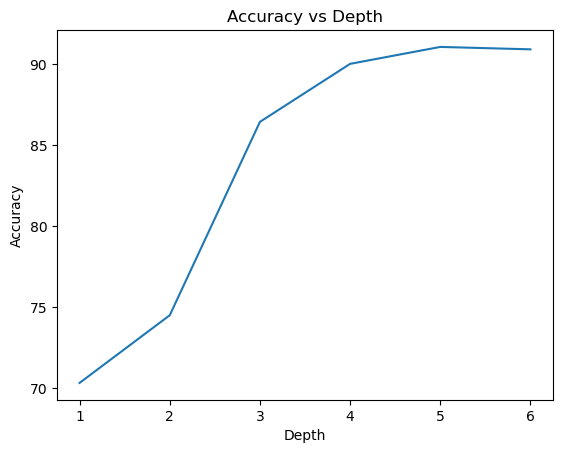

In [26]:
import matplotlib.pyplot as plt

depths = []
accuracies = []

for depth in range(1, 7):
    # Assign model with Decision Tree classifier
    model_dt = DecisionTreeClassifier(max_depth=depth)
    # Training the model with the Training Variables
    model_dt.fit(X_train, Y_train)
    # Predicting the target variable using testing variables
    y_pred1 = model_dt.predict(X_test)
    # Results
    accuracy = accuracy_score(Y_test, y_pred1) * 100
    print("Decision Tree Accuracy at Depth {}: {:.2f}%".format(depth, accuracy))
    depths.append(depth)
    accuracies.append(accuracy)

plt.plot(depths, accuracies)
plt.title("Accuracy vs Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=4)
joblib.dump(model_dt,"model_dt")
#training the model with the Training Variables 
model_dt.fit(X_train, Y_train)
#joblib.dump(model_dt,"model_dt")
#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(X_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(Y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(X_train, Y_train))
print("Test Accuracy:",model_dt.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(Y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred1))
#print(plot_ROC_curve(model_dt,x_train, x_test, y_train, y_test))


Decision Tree Results
Decision Tree Accuracy:  90.01490312965723 %
Train Accuracy: 0.8830670926517572
Test Accuracy: 0.9001490312965723
Precision Score:  0.9001490312965723
Recall Score:  0.9001490312965723
F2 Score:  0.9001490312965722
F1 Score:  0.9001490312965723
Confusion Matrix: 
[[365  17]
 [ 50 239]]


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a sing

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 4)
model_knn.fit(X_train, Y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(X_test)
print("KNN")
print("Train Accuracy:",model_knn.score(X_train, Y_train))
print("Test Accuracy:",model_knn.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_knn,x_train, x_test, y_train, y_test))

KNN
Train Accuracy: 0.8376996805111822
Test Accuracy: 0.7421758569299552
Precision Score:  0.7421758569299552
Recall Score:  0.7421758569299552
F1 Score:  0.7421758569299554


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

# KNN plot for Brute-Force approach

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.7386581469648561


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

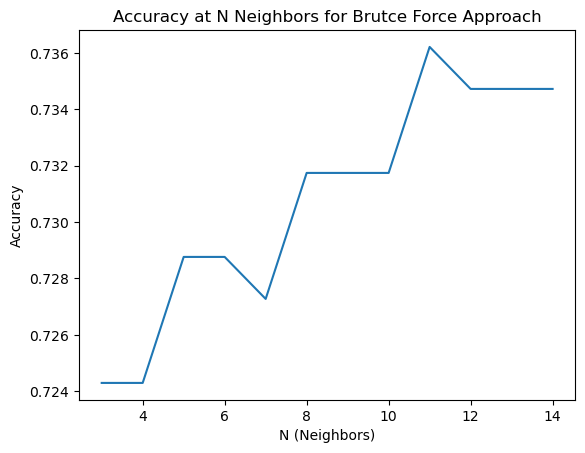

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree', 'brute'],
    'leaf_size': [20, 30]
#     'leaf_size': [10, 20, 30]
}

# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the KNeighborsClassifier using the best parameters found by GridSearchCV
model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
model_knn_best.fit(X_train, Y_train)

# Evaluate the KNeighborsClassifier on the test data
y_pred3 = model_knn_best.predict(X_test)

# Calculate accuracy at different depths for brute force approach
accuracy_levels = []
for i in range(3, 15):
    model_knn_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', leaf_size=1, p=i)
    model_knn_best.fit(X_train, Y_train)
    accuracy_levels.append(model_knn_best.score(X_test, Y_test))
    
# Plot accuracy at different depths for brute force approach
plt.plot(range(3, 15), accuracy_levels)
plt.xlabel('N (Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy at N Neighbors for Brutce Force Approach')
plt.show()

In [35]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)
# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Applying Random Forest")
#print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Precision :', precision_score(Y_test, X_test_prediction, average='weighted'))

print('Recall :', recall_score(Y_test, X_test_prediction, average='weighted'))

print('F1 score : ', f1_score(Y_test, X_test_prediction, average='weighted'))
# get the confusion matrix
conf_mat = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:\n", conf_mat)

Applying Random Forest
Accuracy on Test data :  0.9552906110283159
Precision : 0.9552906110283159
Recall : 0.9552906110283159
F1 score :  0.9552906110283159
Confusion matrix:
 [[367  15]
 [ 15 274]]


# Plot of Accuarcy vs depth for Random Forest

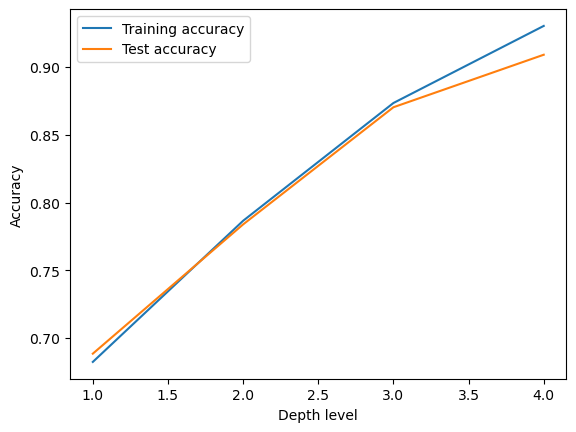

Depth: 4 | Train accuracy: 0.9304 | Test accuracy: 0.9091


In [29]:
import matplotlib.pyplot as plt

# create empty lists
train_acc = []
test_acc = []

# iterate over range of depth levels
for depth in range(1, 5):
    # create model with current depth level
    modelRF = RandomForestClassifier(max_depth=depth)
    modelRF.fit(X_train, Y_train)
    
    # calculate accuracy on training data and append to train_acc
    X_train_prediction = modelRF.predict(X_train)
    train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_acc.append(train_data_accuracy)
    
    # calculate accuracy on test data and append to test_acc
    X_test_prediction = modelRF.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    test_acc.append(test_data_accuracy)

# plot the accuracy vs. depth
plt.plot(range(1, 5), train_acc, label='Training accuracy')
plt.plot(range(1, 5), test_acc, label='Test accuracy')
plt.xlabel('Depth level')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# To print the values
print(f"Depth: {depth} | Train accuracy: {train_data_accuracy:.4f} | Test accuracy: {test_data_accuracy:.4f}")

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a new instance of RandomForestClassifier
rfc = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the RandomForestClassifier using the best parameters found by GridSearchCV
rfc_best = RandomForestClassifier(**grid_search.best_params_)
rfc_best.fit(X_train, Y_train)

# Evaluate the RandomForestClassifier on the test data
Y_pred = rfc_best.predict(X_test)

# Compute the evaluation metrics
test_data_accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy on Test data : ', test_data_accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score : ', f1)

# Print the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n", conf_mat)


KeyboardInterrupt: 

# KNN HpyerParamter tunning


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree', 'brute'],
    'leaf_size': [20, 30]
#     'leaf_size': [10, 20, 30]
}

# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the KNeighborsClassifier using the best parameters found by GridSearchCV
model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
model_knn_best.fit(X_train, Y_train)

# Evaluate the KNeighborsClassifier on the test data
y_pred3 = model_knn_best.predict(X_test)
print("KNN")
# print("Train Accuracy:", model_knn_best.score(X_train, Y_train))
print("Test Accuracy:", model_knn_best.score(X_test, Y_test))
print("Precision Score: ", metrics.precision_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ", metrics.recall_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ", metrics.f1_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_knn,x_train, x_test, y_train, y_test))


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.7386581469648561
KNN
Test Accuracy: 0.7451564828614009
Precision Score:  0.7451564828614009
Recall Score:  0.7451564828614009
F1 Score:  0.7451564828614009


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

# Plot of accuarcy vs depth for kd tree with highest depth

Best parameters:  {'max_depth': 5}
Best score:  0.8907348242811501
Decision Tree
Train Accuracy: 0.918849840255591
Test Accuracy: 0.910581222056632
Precision Score:  0.910581222056632
Recall Score:  0.910581222056632
F1 Score:  0.9105812220566321


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


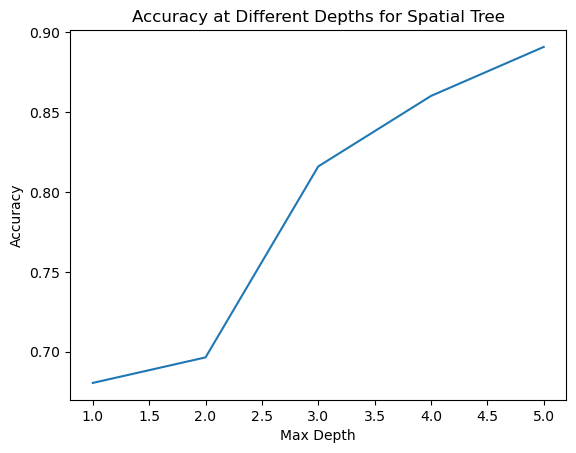

In [38]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
}

# Create an instance of the DecisionTreeClassifier model
model_tree = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_tree, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the DecisionTreeClassifier using the best parameters found by GridSearchCV
model_tree_best = DecisionTreeClassifier(**grid_search.best_params_)
model_tree_best.fit(X_train, Y_train)

# Evaluate the DecisionTreeClassifier on the test data
y_pred = model_tree_best.predict(X_test)
print("Decision Tree")
print("Train Accuracy:", model_tree_best.score(X_train, Y_train))
print("Test Accuracy:", model_tree_best.score(X_test, Y_test))
print("Precision Score: ", metrics.precision_score(Y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score: ", metrics.recall_score(Y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score: ", metrics.f1_score(Y_test, y_pred, pos_label='positive', average='micro'))

# Plot accuracy at different depth levels
depths = param_grid['max_depth']
accuracy = grid_search.cv_results_['mean_test_score']
plt.plot(depths, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Depths for Spatial Tree')
plt.show()


# Plot of accuracy vs depth Kd tree


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.7386581469648561


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

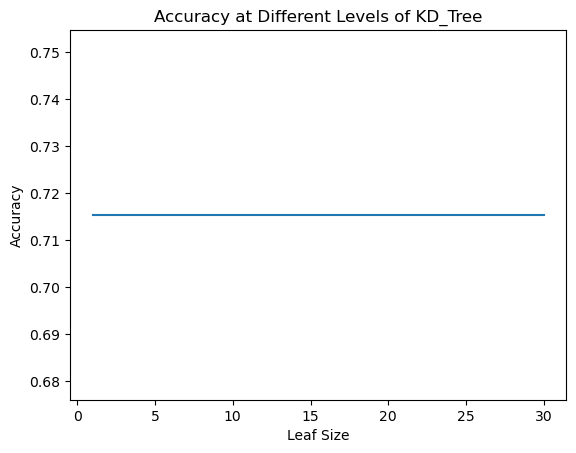

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree','kd_tree', 'brute'],
    'leaf_size': [20, 30]
#     'leaf_size': [10, 20, 30]
}

# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the KNeighborsClassifier using the best parameters found by GridSearchCV
model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
model_knn_best.fit(X_train, Y_train)

# Evaluate the KNeighborsClassifier on the test data
y_pred3 = model_knn_best.predict(X_test)

# Calculate accuracy at different levels of kd_tree
accuracy_levels = []
for i in range(1, 31):
    model_knn_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', leaf_size=i)
    model_knn_best.fit(X_train, Y_train)
    accuracy_levels.append(model_knn_best.score(X_test, Y_test))
    
# Plot accuracy at different levels of kd_tree
plt.plot(range(1, 31), accuracy_levels)
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Levels of KD_Tree')
plt.show()


# Plot of accuarcy vs depth for ball tree

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'brute'],
    'leaf_size': [20, 30]
#     'leaf_size': [10, 20, 30]
}

# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the KNeighborsClassifier using the best parameters found by GridSearchCV
model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
model_knn_best.fit(X_train, Y_train)

# Evaluate the KNeighborsClassifier on the test data
y_pred3 = model_knn_best.predict(X_test)

# Calculate accuracy at different depths of ball_tree
accuracy_levels = []
for i in range(1, 31):
    model_knn_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', leaf_size=20, p=2, depth=i)
    model_knn_best.fit(X_train, Y_train)
    accuracy_levels.append(model_knn_best.score(X_test, Y_test))
    
# Plot accuracy at different depths of ball_tree
plt.plot(range(1, 31), accuracy_levels)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Depths of Ball_Tree')
plt.show()


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Best parameters:  {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.7386581469648561


TypeError: __init__() got an unexpected keyword argument 'depth'

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree'],
    'max_depth': range(1, 31)
}

# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the KNeighborsClassifier using the best parameters found by GridSearchCV
model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
model_knn_best.fit(X_train, Y_train)

# Evaluate the KNeighborsClassifier on the test data
y_pred3 = model_knn_best.predict(X_test)

# Calculate accuracy at different depths of BallTree
accuracy_levels = []
for i in range(1, 31):
    model_knn_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', max_depth=i)
    model_knn_best.fit(X_train, Y_train)
    accuracy_levels.append(model_knn_best.score(X_test, Y_test))
    
# Plot accuracy at different depths of BallTree
plt.plot(range(1, 31), accuracy_levels)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Depths of BallTree')
plt.show()


ValueError: Invalid parameter max_depth for estimator KNeighborsClassifier(algorithm='ball_tree'). Check the list of available parameters with `estimator.get_params().keys()`.

# Plot of KNN bruteforce with marker/label

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

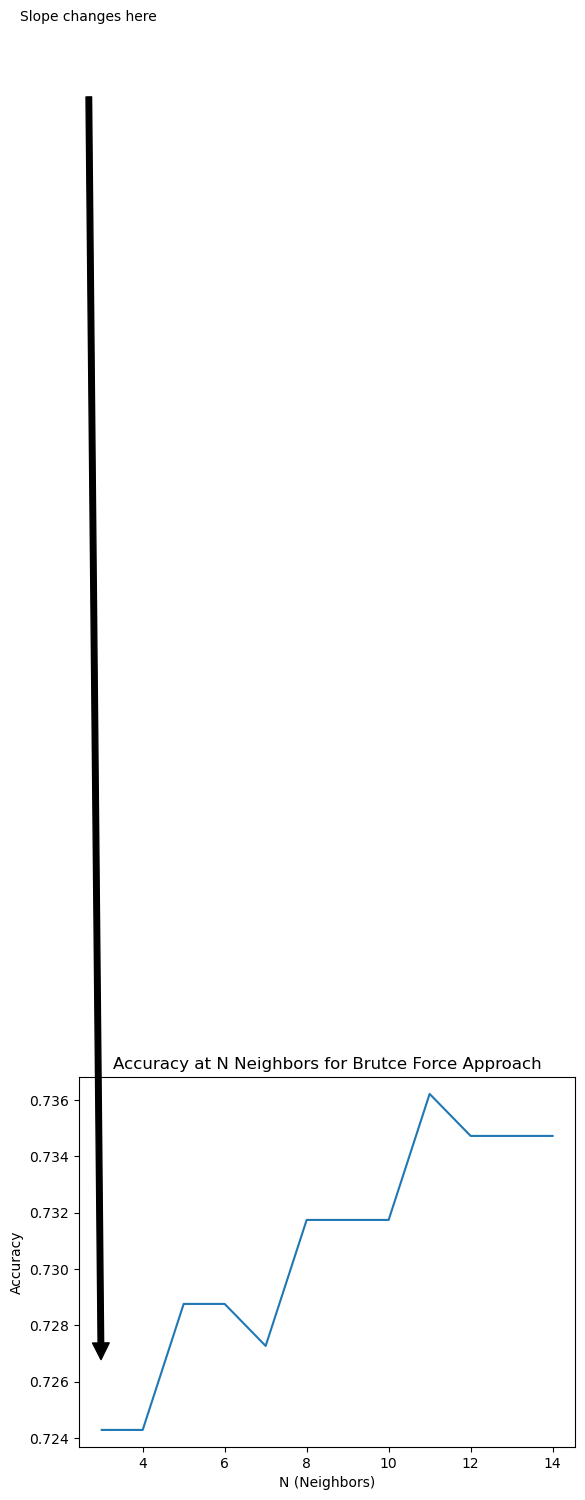

In [25]:
# Calculate accuracy at different depths for brute force approach
accuracy_levels = []
for i in range(3, 15):
    model_knn_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', leaf_size=1, p=i)
    model_knn_best.fit(X_train, Y_train)
    accuracy_levels.append(model_knn_best.score(X_test, Y_test))

# Find the index where the slope changes
slope_changes_idx = 0
for i in range(1, len(accuracy_levels)):
    if abs(accuracy_levels[i] - accuracy_levels[i-1]) > 0.01:
        slope_changes_idx = i
        break

# Plot accuracy at different depths for brute force approach with a label/marker where the slope changes
plt.plot(range(3, 15), accuracy_levels)
plt.xlabel('N (Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy at N Neighbors for Brutce Force Approach')

# Add a label/marker at the point where the slope changes
plt.annotate('Slope changes here', xy=(slope_changes_idx+3, accuracy_levels[slope_changes_idx]), xytext=(slope_changes_idx+1, accuracy_levels[slope_changes_idx]+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.7386581469648561


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

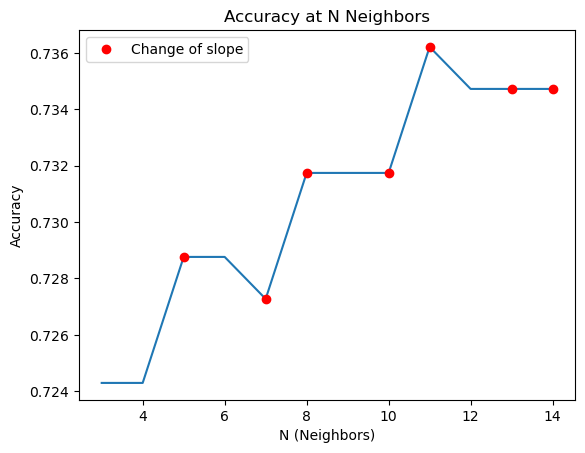

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree', 'brute'],
    'leaf_size': [20, 30]
#     'leaf_size': [10, 20, 30]
}

# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the KNeighborsClassifier using the best parameters found by GridSearchCV
model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
model_knn_best.fit(X_train, Y_train)

# Evaluate the KNeighborsClassifier on the test data
y_pred3 = model_knn_best.predict(X_test)

# Calculate accuracy at different depths for brute force approach
accuracy_levels = []
for i in range(3, 15):
    model_knn_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', leaf_size=1, p=i)
    model_knn_best.fit(X_train, Y_train)
    accuracy_levels.append(model_knn_best.score(X_test, Y_test))

# Calculate the second derivative of the curve
second_derivative = np.gradient(np.gradient(accuracy_levels))

# Find the indices where the second derivative changes sign
idx = np.where(np.diff(np.sign(second_derivative)))[0]

# Plot accuracy at different depths for brute force approach with markers where the curve changes direction
plt.plot(range(3, 15), accuracy_levels)
plt.xlabel('N (Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy at N Neighbors')

plt.plot(np.array(range(3, 15))[idx+1], np.array(accuracy_levels)[idx+1], 'ro', label='Change of slope')

plt.legend()
plt.show()


Best parameters:  {'max_depth': 5}
Best score:  0.8900958466453675
Decision Tree
Train Accuracy: 0.918849840255591
Test Accuracy: 0.910581222056632
Precision Score:  0.910581222056632
Recall Score:  0.910581222056632
F1 Score:  0.9105812220566321


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


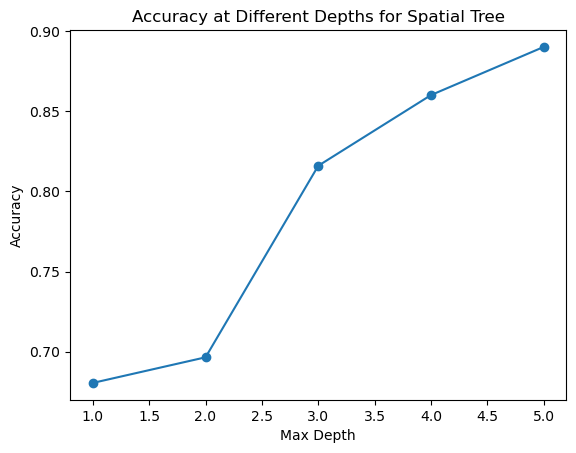

In [30]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
}

# Create an instance of the DecisionTreeClassifier model
model_tree = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_tree, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the DecisionTreeClassifier using the best parameters found by GridSearchCV
model_tree_best = DecisionTreeClassifier(**grid_search.best_params_)
model_tree_best.fit(X_train, Y_train)

# Evaluate the DecisionTreeClassifier on the test data
y_pred = model_tree_best.predict(X_test)
print("Decision Tree")
print("Train Accuracy:", model_tree_best.score(X_train, Y_train))
print("Test Accuracy:", model_tree_best.score(X_test, Y_test))
print("Precision Score: ", metrics.precision_score(Y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score: ", metrics.recall_score(Y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score: ", metrics.f1_score(Y_test, y_pred, pos_label='positive', average='micro'))

# Plot accuracy at different depth levels
# depths = param_grid['max_depth']
# accuracy = grid_search.cv_results_['mean_test_score']
# plt.plot(depths, accuracy)
# plt.xlabel('Max Depth')
# plt.ylabel('Accuracy')
# plt.title('Accuracy at Different Depths for Spatial Tree')
# plt.show()


# Plot accuracy at different depth levels with markers at points where slope changes direction
depths = param_grid['max_depth']
accuracy = grid_search.cv_results_['mean_test_score']
plt.plot(depths, accuracy, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Depths for Spatial Tree')

# Add markers at points where slope changes direction
for i in range(1, len(accuracy)-1):
    if ((accuracy[i] - accuracy[i-1]) * (accuracy[i+1] - accuracy[i])) < 0:
        plt.plot(depths[i], accuracy[i], 'ro')

plt.show()

# Plot accuracy at different depth levels
# depths = param_grid['max_depth']
# accuracy = grid_search.cv_results_['mean_test_score']
# plt.plot(depths, accuracy)
# plt.xlabel('Max Depth')
# plt.ylabel('Accuracy')
# plt.title('Accuracy at Different Depths for Spatial Tree')

# # Find the index where the slope changes
# slope_changes_idx = 0
# for i in range(1, len(accuracy)):
#     if abs(accuracy[i] - accuracy[i-1]) > 0.01:
#         slope_changes_idx = i
#         break

# # Add a label/marker at the point where the slope changes
# plt.annotate('Slope changes here', xy=(depths[slope_changes_idx], accuracy[slope_changes_idx]), xytext=(depths[slope_changes_idx]-0.5, accuracy[slope_changes_idx]+0.05),
#              arrowprops=dict(facecolor='black', shrink=0.05))
# plt.show()


Best parameters:  {'max_depth': 5}
Best score:  0.8907348242811501
Decision Tree
Train Accuracy: 0.918849840255591
Test Accuracy: 0.910581222056632
Precision Score:  0.910581222056632
Recall Score:  0.910581222056632
F1 Score:  0.9105812220566321


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


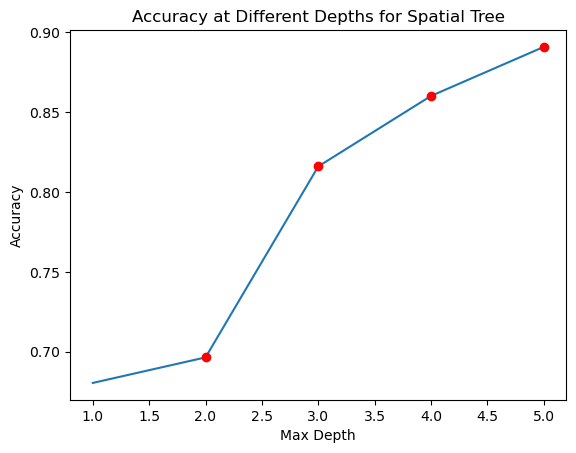

In [33]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
}

# Create an instance of the DecisionTreeClassifier model
model_tree = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model_tree, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the DecisionTreeClassifier using the best parameters found by GridSearchCV
model_tree_best = DecisionTreeClassifier(**grid_search.best_params_)
model_tree_best.fit(X_train, Y_train)

# Evaluate the DecisionTreeClassifier on the test data
y_pred = model_tree_best.predict(X_test)
print("Decision Tree")
print("Train Accuracy:", model_tree_best.score(X_train, Y_train))
print("Test Accuracy:", model_tree_best.score(X_test, Y_test))
print("Precision Score: ", metrics.precision_score(Y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score: ", metrics.recall_score(Y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score: ", metrics.f1_score(Y_test, y_pred, pos_label='positive', average='micro'))

# Plot accuracy at different depth levels
depths = param_grid['max_depth']
accuracy = grid_search.cv_results_['mean_test_score']
plt.plot(depths, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Depths for Spatial Tree')

# Plot points where the slope changes direction in red color
for i in range(1, len(accuracy)):
    if accuracy[i] > accuracy[i-1]:
        plt.plot(depths[i], accuracy[i], 'ro', label='Change of slope')
    else:
        plt.plot(depths[i], accuracy[i], 'ro', color='red', label='Change of slope')
plt.show()


In [36]:
import matplotlib.pyplot as plt

# Define the data
features = ['BRISK', 'SIFT']
accuracy = [0.55, 0.91]

# Create the bar graph
plt.bar(methods, accuracy, color=['green', 'blue'])

# Set the title and axis labels
plt.title('Accuracy of SIFT and BRISK')
plt.xlabel('Feature')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


NameError: name 'methods' is not defined

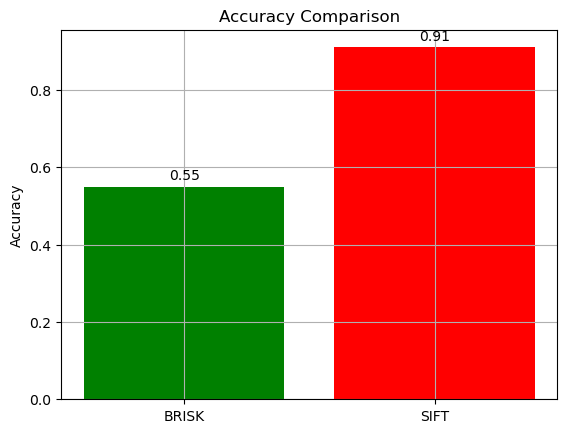

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the methods and their corresponding accuracies
methods = ['BRISK', 'SIFT']
accuracies = [0.55, 0.91]

# Create a bar chart
fig, ax = plt.subplots()
rects = ax.bar(methods, accuracies, color=['green', 'red'])

# Add labels, title, and gridlines
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True)

# Add text annotations to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


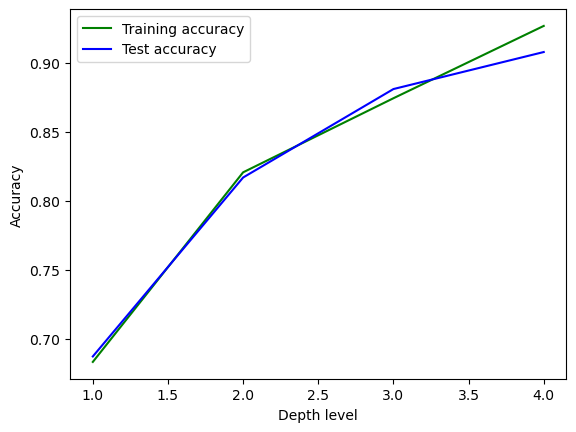

Depth: 4 | Train accuracy: 0.9265 | Test accuracy: 0.9076


In [45]:
import matplotlib.pyplot as plt

# create empty lists
train_acc = []
test_acc = []

# iterate over range of depth levels
for depth in range(1, 5):
    # create model with current depth level
    modelRF = RandomForestClassifier(max_depth=depth)
    modelRF.fit(X_train, Y_train)
    
    # calculate accuracy on training data and append to train_acc
    X_train_prediction = modelRF.predict(X_train)
    train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_acc.append(train_data_accuracy)
    
    # calculate accuracy on test data and append to test_acc
    X_test_prediction = modelRF.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    test_acc.append(test_data_accuracy)

# plot the accuracy vs. depth
plt.plot(range(1, 5), train_acc, label='Training accuracy', color='green')
plt.plot(range(1, 5), test_acc, label='Test accuracy', color='blue')
plt.xlabel('Depth level')
plt.ylabel('Accuracy')
plt.legend()

# mark the points where slope changes direction
for i in range(1, len(train_acc)):
    if train_acc[i] - train_acc[i-1] < 0:
        plt.plot(i+1, train_acc[i], 'ro')
    if test_acc[i] - test_acc[i-1] < 0:
        plt.plot(i+1, test_acc[i], 'ro')
        
plt.show()

# To print the values
print(f"Depth: {depth} | Train accuracy: {train_data_accuracy:.4f} | Test accuracy: {test_data_accuracy:.4f}")


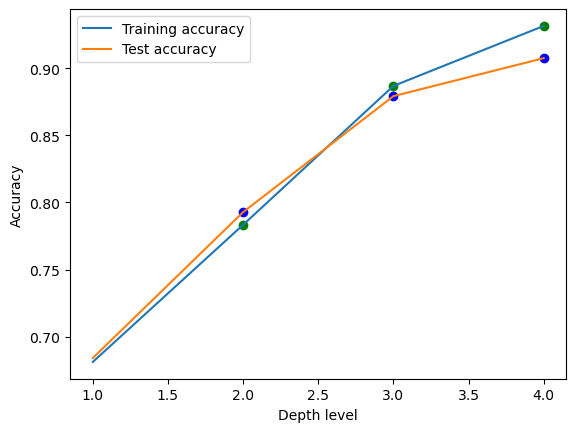

Depth: 4 | Train accuracy: 0.9316 | Test accuracy: 0.9076


In [46]:
import matplotlib.pyplot as plt

# create empty lists
train_acc = []
test_acc = []

# iterate over range of depth levels
for depth in range(1, 5):
    # create model with current depth level
    modelRF = RandomForestClassifier(max_depth=depth)
    modelRF.fit(X_train, Y_train)
    
    # calculate accuracy on training data and append to train_acc
    X_train_prediction = modelRF.predict(X_train)
    train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_acc.append(train_data_accuracy)
    
    # calculate accuracy on test data and append to test_acc
    X_test_prediction = modelRF.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    test_acc.append(test_data_accuracy)

# plot the accuracy vs. depth
plt.plot(range(1, 5), train_acc, label='Training accuracy')
plt.plot(range(1, 5), test_acc, label='Test accuracy')
plt.xlabel('Depth level')
plt.ylabel('Accuracy')
plt.legend()

# mark the points where slope changes direction
for i in range(len(train_acc)-1):
    
    slope_train = train_acc[i+1] - train_acc[i]
    slope_test = test_acc[i+1] - test_acc[i]
    if slope_train > 0 and slope_test > 0:
        plt.scatter(i+2, train_acc[i+1], color='green', marker='o')
        plt.scatter(i+2, test_acc[i+1], color='blue', marker='o')
    elif slope_train < 0 and slope_test < 0:
        plt.scatter(i+2, train_acc[i+1], color='green', marker='o')
        plt.scatter(i+2, test_acc[i+1], color='blue', marker='o')
    else:
        plt.scatter(i+2, train_acc[i+1], color='red', marker='o')
        plt.scatter(i+2, test_acc[i+1], color='red', marker='o')

plt.show()

# To print the values
print(f"Depth: {depth} | Train accuracy: {train_data_accuracy:.4f} | Test accuracy: {test_data_accuracy:.4f}")


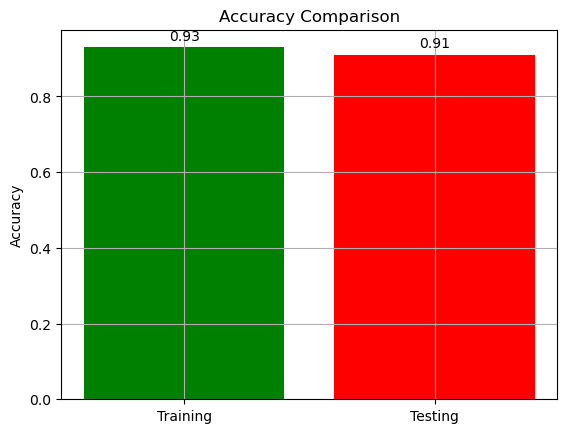

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the methods and their corresponding accuracies
methods = ['Training', 'Testing']
accuracies = [0.93, 0.91]

# Create a bar chart
fig, ax = plt.subplots()
rects = ax.bar(methods, accuracies, color=['green', 'red'])

# Add labels, title, and gridlines
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True)

# Add text annotations to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


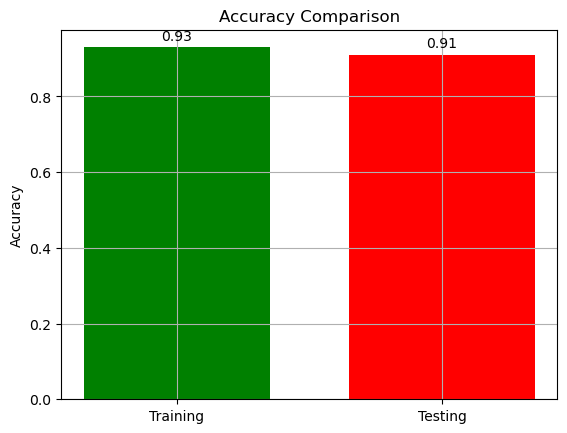

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the methods and their corresponding accuracies
methods = ['Training', 'Testing']
accuracies = [0.90, 0.88]

# Create a bar chart with reduced width
fig, ax = plt.subplots()
rects = ax.bar(methods, accuracies, color=['green', 'red'], width=0.7)

# Add labels, title, and gridlines
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True)

# Add text annotations to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


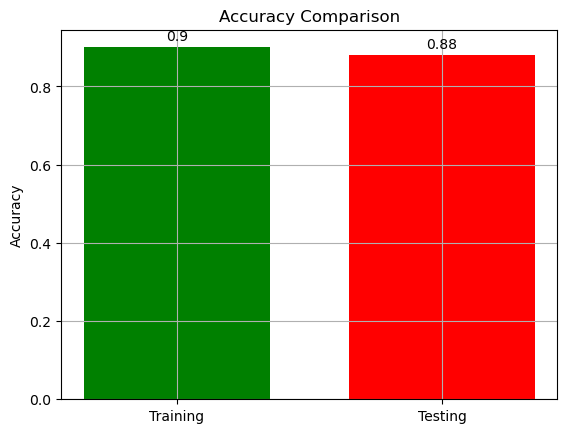

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the methods and their corresponding accuracies
methods = ['Training', 'Testing']
accuracies = [0.90, 0.88]

# Create a bar chart with reduced width
fig, ax = plt.subplots()
rects = ax.bar(methods, accuracies, color=['green', 'red'], width=0.7)

# Add labels, title, and gridlines
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True)

# Add text annotations to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


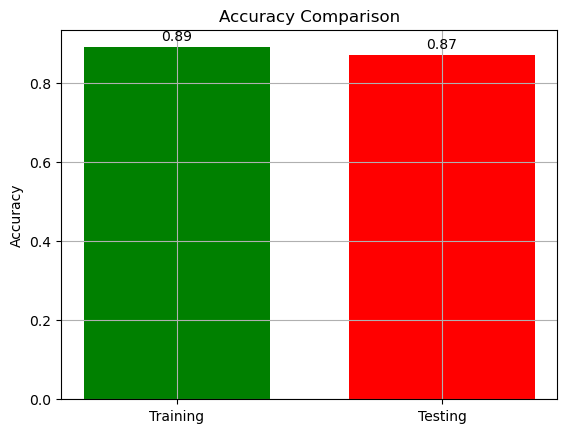

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the methods and their corresponding accuracies
methods = ['Training', 'Testing']
accuracies = [0.89, 0.87]

# Create a bar chart with reduced width
fig, ax = plt.subplots()
rects = ax.bar(methods, accuracies, color=['green', 'red'], width=0.7)

# Add labels, title, and gridlines
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True)

# Add text annotations to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Applying Random Forest")
#print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Precision :', precision_score(Y_test, X_test_prediction, average='weighted'))

print('Recall :', recall_score(Y_test, X_test_prediction, average='weighted'))

print('F1 score : ', f1_score(Y_test, X_test_prediction, average='weighted'))

# get the confusion matrix
conf_mat = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:\n", conf_mat)

# get the AUC score
auc_score = roc_auc_score(Y_test, X_test_prediction)
print('AUC score:', auc_score)


Applying Random Forest
Accuracy on Test data :  0.9567809239940388
Precision : 0.9567635047515822
Recall : 0.9567809239940388
F1 score :  0.9567527008912899
Confusion matrix:
 [[369  13]
 [ 16 273]]
AUC score: 0.9553026322940633


In [60]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import fbeta_score

# Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=4)
joblib.dump(model_dt,"model_dt")

# Training the model with the training variables 
model_dt.fit(X_train, Y_train)

# Predicting the target variable using testing variables
y_pred1 = model_dt.predict(X_test)

# Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ", accuracy_score(Y_test, y_pred1)*100, "%")
print("Train Accuracy:", model_dt.score(X_train, Y_train))
print("Test Accuracy:", model_dt.score(X_test, Y_test))
print("Precision Score: ", precision_score(Y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ", recall_score(Y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ", fbeta_score(Y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ", f1_score(Y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred1))

# Compute the AUC
y_prob1 = model_dt.predict_proba(X_test)
y_prob1 = y_prob1[:, 1]
auc = roc_auc_score(Y_test, y_prob1)
print("AUC: ", auc)


Decision Tree Results
Decision Tree Accuracy:  90.01490312965723 %
Train Accuracy: 0.8830670926517572
Test Accuracy: 0.9001490312965723
Precision Score:  0.9001490312965723
Recall Score:  0.9001490312965723
F2 Score:  0.9001490312965722
F1 Score:  0.9001490312965723
Confusion Matrix: 
[[365  17]
 [ 50 239]]
AUC:  0.9401619594557873


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a sing

In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_neighbors': [5, 7],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['kd_tree', 'brute'],
#     'leaf_size': [20, 30]
# #     'leaf_size': [10, 20, 30]
# }

# # Create an instance of the KNeighborsClassifier model
# model_knn = KNeighborsClassifier()

# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(model_knn, param_grid=param_grid, cv=5)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, Y_train)

# # Print the best parameters and best score found by GridSearchCV
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# # Train the KNeighborsClassifier using the best parameters found by GridSearchCV
# model_knn_best = KNeighborsClassifier(**grid_search.best_params_)
# model_knn_best.fit(X_train, Y_train)

# # Evaluate the KNeighborsClassifier on the test data
# # y_pred3 = model_knn_best.predict(X_test)
# # print("KNN")
# # print("Train Accuracy:", model_knn_best.score(X_train, Y_train))
# # print("Test Accuracy:", model_knn_best.score(X_test, Y_test))
# # print("Precision Score: ", metrics.precision_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# # print("Recall Score: ", metrics.recall_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# # print("F1 Score: ", metrics.f1_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# # # print(plot_ROC_curve(model_knn,x_train, x_test, y_train, y_test))

# # Evaluate the KNeighborsClassifier on the test data
# y_pred3 = model_knn_best.predict(X_test)
# y_prob3 = model_knn_best.predict_proba(X_test)
# y_prob3 = y_prob3[:, 1] # use only the positive class probabilities
# print("KNN")
# # print("Train Accuracy:", model_knn_best.score(X_train, Y_train))
# print("Test Accuracy:", model_knn_best.score(X_test, Y_test))
# print("Precision Score: ", metrics.precision_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print("Recall Score: ", metrics.recall_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print("F1 Score: ", metrics.f1_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print("AUC:", metrics.roc_auc_score(Y_test, y_prob3))



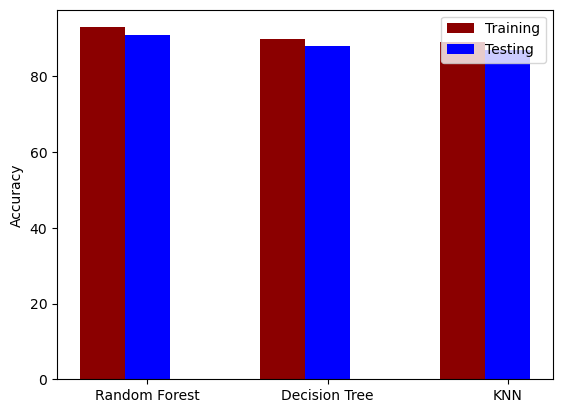

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data1 = [93, 90, 89]
data2 = [91, 88, 87]
# data3 = [30, 50, 10, 20, 40]

# Set the positions and width of the bars
pos = np.arange(len(data1))
width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars
rects1 = ax.bar(pos, data1, width, color='darkred')
rects2 = ax.bar(pos + width, data2, width, color='blue')
# rects3 = ax.bar(pos + 2*width, data3, width, color='b')

# Set the labels and title
# ax.set_xlabel('Categories')
ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy Comparision')

# Set the x-axis tick marks and labels
ax.set_xticks(pos + width)
ax.set_xticklabels(['Random Forest', 'Decision Tree', 'KNN'])

# Set the legend
ax.legend((rects1[0], rects2[0]), ('Training', 'Testing'))

# Show the plot
plt.show()


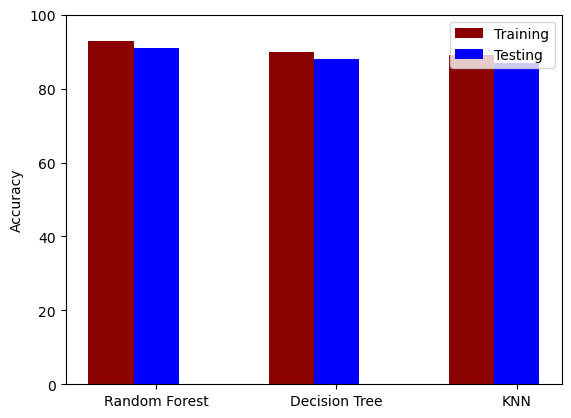

In [37]:
# Sample data
data1 = [93, 90, 89]
data2 = [91, 88, 87]

# Set the positions and width of the bars
pos = np.arange(len(data1))
width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars
rects1 = ax.bar(pos, data1, width, color='darkred')
rects2 = ax.bar(pos + width, data2, width, color='blue')

# Set the labels and title
ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy Comparison')

# Set the x-axis tick marks and labels
ax.set_xticks(pos + width)
ax.set_xticklabels(['Random Forest', 'Decision Tree', 'KNN'])

# Set the legend
ax.legend((rects1[0], rects2[0]), ('Training', 'Testing'))

# Set the y-axis limits
ax.set_ylim([0, 100])

# Show the plot
plt.show()


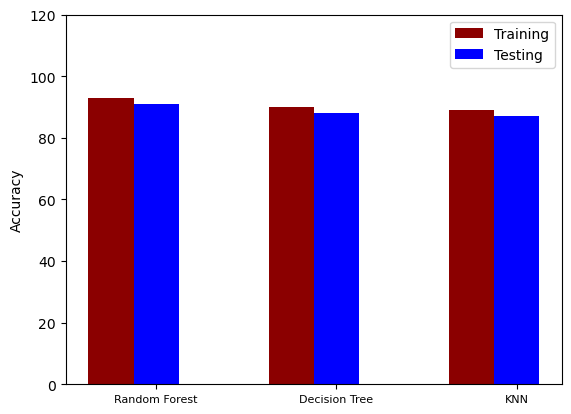

In [53]:
# Sample data
data1 = [93, 90, 89]
data2 = [91, 88, 87]

# Set the positions and width of the bars
pos = np.arange(len(data1))
width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars
rects1 = ax.bar(pos, data1, width, color='darkred')
rects2 = ax.bar(pos + width, data2, width, color='blue')

# Set the labels and title
ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy Comparison')

# Set the x-axis tick marks and labels
ax.set_xticks(pos + width)
ax.set_xticklabels(['Random Forest', 'Decision Tree', 'KNN'], fontsize=8, rotation=0)

# Set the legend
ax.legend((rects1[0], rects2[0]), ('Training', 'Testing'), fontsize=10)

# Set the y-axis limits
ax.set_ylim([0, 120])

# Show the plot
plt.show()


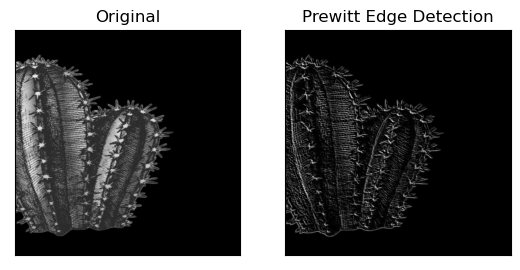

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:/Users/Ajinkya Sathe/Desktop/bg_remove_cactus0.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Prewitt edge detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)

# Combine the horizontal and vertical edge images
img_prewitt = cv2.addWeighted(img_prewittx, 0.5, img_prewitty, 0.5, 0)

# Plot the original and edge-detected images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

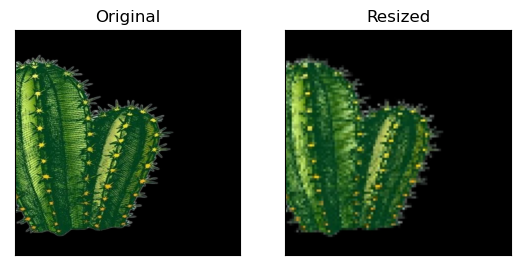

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:/Users/Ajinkya Sathe/Desktop/bg_remove_cactus0.jpg')

# Resize the image to (100, 100) using linear interpolation
resized_img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)

# Plot the original and resized images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('Resized')
plt.xticks([])
plt.yticks([])



plt.show()


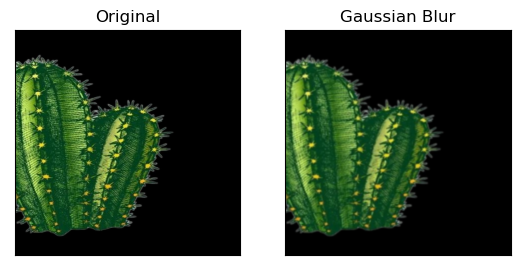

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:/Users/Ajinkya Sathe/Desktop/bg_remove_cactus0.jpg')

# Apply Gaussian blur with a kernel size of 5x5 and sigma of 0
blur_img = cv2.GaussianBlur(img, (5, 5), 0)

# Plot the original and blurred images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur')
plt.xticks([])
plt.yticks([])

plt.show()
